In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

## wikipedia API | 获取category下的page

In [ ]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('en')

category = wiki_wiki.page("Category:Indian_action_films")


def print_categorymembers(categorymembers, level=0, max_level=2):
        for c in categorymembers.values():
            print("{level_tag}: {title} (ns: {ns})".format(level_tag="*"*(level+1), title=c.title, ns=c.ns))
            if c.ns == wikipediaapi.Namespace.CATEGORY and level <= max_level:
                print_categorymembers(c.categorymembers, level + 1)


## wikipedia API | 获取Pageview

In [ ]:
import pageviewapi as pv
import pageviewapi.period
from urllib.parse import quote

# [Timeline of the 2004 Indian Ocean earthquake]
# [Tingya]
# [Tokyo Conference]
# [Tom Hart (baseball)]
# [Triloknath Pandit]
# [Turtle Point Indian Reserve No. 12] wikipedia API 'Not found'
# [Udupi Kochikar Pai Family]
# [Umar Bin Muhammad Daudpota]
# [Unacademy]
# [University Convocation Complex]


target_raw = "Amitesh Mishra"
target = quote(target_raw)
target

b,e="20181010","20181020"

# pv.per_article('en.wikipedia',target,b,e,access="all-access",agent="all-agents",granularity="daily")

int(pv.period.avg_last("en.wikipedia",target,last=30))

# pageviewapi.legacy_pagecounts('fr.wikipedia', '2010010100', '2011010100', granularity='monthly')

In [ ]:
import itertools
import pageviewapi as pv
import pageviewapi.period
from collections import deque
from urllib.parse import quote
def gen_titles():
    with open("/home/zhoutong/indiaDict_onlyTitle.txt","r") as f:
        for line in f:
            yield line.strip("[]\n")


dictGen = gen_titles()
save_batch = 1024
cnt = 0
with open("/home/zhoutong/indiaDict_title_withPV","w+") as f:
    while True:
        cnt += 1
        targetList = list(itertools.islice(dictGen,save_batch))
        if(len(targetList)>0):
            to_write = deque()
            for target_raw in targetList:
                target = quote(target_raw)
                try:
                    last_7 = int(pv.period.sum_last("en.wikipedia",target,last=7))
                    last_30 = int(pv.period.sum_last("en.wikipedia",target,last=30))
                    last_90 = int(pv.period.sum_last("en.wikipedia",target,last=90))
                    last_365 = int(pv.period.sum_last("en.wikipedia",target,last=365))
                except pageviewapi.client.ZeroOrDataNotLoadedException as exp:
                    last_7 = -1
                    last_30 = -1
                    last_90 = -1
                    last_365 = -1
                result = [str(i) for i in [target,last_7,last_30,last_90,last_365]]
                to_write.append("\u0394".join(result)+"\n")
                
            f.writelines(to_write)
            print("%s completed" % (cnt*save_batch))
        else:
            break

#     ../pangguosheng/python/bin/python


## 脚本用

In [ ]:
#####################
# ppp.sh:
#   nohup python3 -u xxx.py > out_xxx.out &
#   nohup python3 -u xxx.py > out_xxx.out &
#   nohup python3 -u xxx.py > out_xxx.out &
# 同时开启多个python进程调用wikiAPI
#####################
import itertools
import pageviewapi as pv
import pageviewapi.period
from collections import deque
import sys
from urllib.parse import quote

file_tag = sys.argv[1]
load_path = "/home/zhoutong/indiaDicts/indiaDict_onlyTitle_%s" % file_tag
save_path = "/home/zhoutong/indiaDicts_withPV/indiaDict_%s" % file_tag
print("file_tag is %s" % file_tag)
print("read file at: %s" % load_path)
print("save file at: %s" % save_path)
def gen_titles():
    with open(load_path,"r") as f:
        for line in f:
            yield line.strip("[]\n")


dictGen = gen_titles()
save_batch = 10
cnt = 0
with open(save_path,"w+") as f:
    while True:
        cnt += 1
        targetList = list(itertools.islice(dictGen,save_batch))
        if(len(targetList)>0):
            to_write = deque()
            for target_raw in targetList:
                target = quote(target_raw)
                try:
                    last_7 = int(pv.period.sum_last("en.wikipedia",target,last=7))
                    last_30 = int(pv.period.sum_last("en.wikipedia",target,last=30))
                    last_90 = int(pv.period.sum_last("en.wikipedia",target,last=90))
                    last_365 = int(pv.period.sum_last("en.wikipedia",target,last=365))
                except pageviewapi.client.ZeroOrDataNotLoadedException as exp:
                    last_7 = -1
                    last_30 = -1
                    last_90 = -1
                    last_365 = -1
                result = [str(i) for i in [target_raw,last_7,last_30,last_90,last_365]]
                to_write.append("\u0394".join(result)+"\n")
                
            f.writelines(to_write)
            print("%s completed" % (cnt*save_batch))
        else:
            break




In [ ]:
from urllib.parse import unquote

with open("/home/zhoutong/indiaDicts_withPV/indiaDictWith_Title_PV.txt", "w+") as f_toSave:
    with open("/home/zhoutong/indiaDicts_withPV/indiaDictWith_Title_PV_urlencode.txt", "r+") as f:
        f_toSave.writelines([unquote(i) for i in f.readlines()])


In [ ]:
"\u0394"


## 可视化

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
df = pd.read_csv("/home/zhoutong/data.csv",header=None,names=["textLength","pv7","pv30","pv90","pv365"])
# df['pv7'] = df['pv7'].apply(lambda x: x if x>0 else 1).apply(math.log)
df.head(3)

,textLength,pv7,pv30,pv90,pv365
0,11,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,44,NaN,NaN,NaN,NaN


In [3]:
# 0.999 百分位 和 0.001 百分位
threshold = df['pv7'].quantile(0.99999)
df['pv7'].describe()
df.describe()
df.quantile(0.01)

textLength    0.0
pv7           NaN
pv30          NaN
pv90          NaN
pv365         NaN
Name: 0.01, dtype: float64

In [4]:
# 统计 textLength
def sta(inp,left_cut=-float('inf'),right_cut=float('inf'),top_cut=float("inf"),show=0):
    df_tmp = df.groupby(inp).size().reset_index(name="count").sort_values(by=[inp])
    df_toUse = df_tmp[(df_tmp[inp] > left_cut) & (df_tmp[inp] < right_cut) & (df_tmp["count"]<top_cut)]
    df_toUse.plot(title=inp,x=inp,y='count')
    plt.show()
    print("*** groupby(inp).size:\n",df_toUse.groupby(inp).size().reset_index(name="count").describe())
    if(show>0): print("*** head(show)\n",df_toUse.groupby(inp).size().reset_index(name="count").head(show))


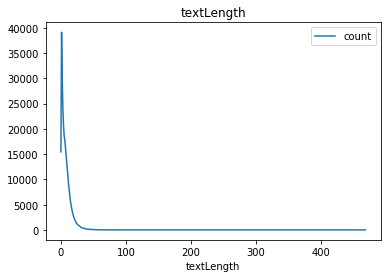

*** groupby(inp).size:
        textLength  count
count  158.000000  158.0
mean    88.727848    1.0
std     66.530262    0.0
min      0.000000    1.0
25%     39.250000    1.0
50%     78.500000    1.0
75%    126.750000    1.0
max    469.000000    1.0


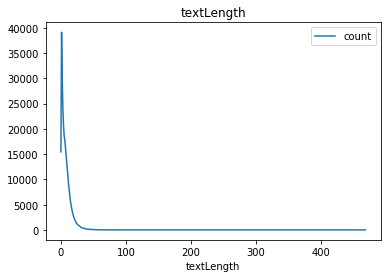

*** groupby(inp).size:
        textLength  count
count  158.000000  158.0
mean    88.727848    1.0
std     66.530262    0.0
min      0.000000    1.0
25%     39.250000    1.0
50%     78.500000    1.0
75%    126.750000    1.0
max    469.000000    1.0


In [11]:
sta("textLength")
sta("textLength",right_cut=100*1000)

In [6]:
sta("pv7")
sta("pv7",top_cut=3,show=10)

ValueError: Length of passed values is 295067, index implies 0

In [ ]:
sta("pv30")

In [ ]:
sta("pv365")

In [ ]:
int('inf')

In [ ]:
tmp = df['pv7'].sort_values().reset_index(drop=True)

a = tmp[(tmp.index>142280)]

a.plot(kind='hist')




In [ ]:
df1=pd.read_csv("/home/zhoutong/data.csv",header=None,names=["hit_wordCnt"])
df1.plot(kind='hist')
df1[df1['hit_wordCnt'] <= 2].size


# df1[df1['hit_wordCnt'] >= 50].size
df1.quantile(0.28)
df1.size


## 统一分析DeepFM的log日志

In [7]:
file_dir = ["auc_872_params1","auc_8799","dt=2018-12-14-09-40-48",
            "dt=2018-12-17-09-46-11","dt=2018-12-17-12-18-29",
            "dt=2018-12-17-13-26-45","dt=2018-12-17-15-22-38",
            "dt=2018-12-18-10-20-48","dt=2018-12-18-12-50-44",
            "dt=2018-12-18-14-16-55","dt=2018-12-18-16-44-06",
            "dt=2018-12-18-18-31-56","dt=2018-12-18-20-58-05",
            "dt=2018-12-19-17-28-02","dt=2018-12-19-21-43-13",
            "dt=2018-12-20-17-50-19"]
base_path = "/home/zhoutong/tf_modelInfo/type=midas/{dir}/auc_logloss.log"

In [22]:
def generate():
    with open(base_path.format(dir=file_dir[0]),'r') as f:
        for line in f:
            yield line
generator = generate()

In [ ]:
total_parameters cnt : 1917031
feature_embeddings size=173873*10=1738730
feature_bias size=173873*1=173873
layer_0 size=266*16=4256
bias_0 size=1*16=16
layer_1 size=16*8=128
bias_1 size=1*8=8
concat_projection size=19*1=19
concat_bias size==0


In [24]:
for i in generator:
    if "/home/zhoutong/data/apus_ad/" in i:
        i.split(" ")[-1]
    elif :
        

'INFO |2018-12-20 09:28:36|   /home/zhoutong/data/apus_ad/midas/tfrecord_2018-11-01_to_2018-11-23_and_2018-11-24_to_2018-11-30_itr_filterRepeatView_intersectLR_addBucket_fra0.01\n'